# Atlantic Ocean Temperature Anomalies and the Correlation with Hurricane Development

COMP 4447 - Final Project - Kristoffer Sorensen

This project will discuss the impact ocean temperature fluctuation (referred to as SST's) has on the severity and frequency of Atlantic-born hurricanes. The data will begin in 1851 and go until 2015, with the goal of identifying any trends or abnormalities that may occur between the two datasets. Correlation will be used to look into relationships and see how SST's may impact hurricanes. Due to the nature of hurricane structure, SST's alone are not responsible for the formation of such storms, therefore this project does not imply causation on hurricanes, meaning SST's are not the lone factor responsible for hurricane formation.

The first section uses pandas to format the Hurricane dataset. Our focus is on storms that classify as Hurricanes (HU). From here, we can choose to use ID values from every storm, i.e. unique values that symbolize the event rather than every point in the storms life.

The Hurricane dataframe will consist of 6 inital columns, from which more will be added to include the category of the storm and the maximum sustained wind speeds during each Hurricanes life cycle. Using pandas groupby() tool will allow for the truncation of the original dataframe, having one row that constitutes each Hurricane from 1851 to 2015.

In [3]:
# all modules to be used here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

### Hurricane Reports (1851 - 2015)

In [4]:
# Pandas for Hurricane dataset 

# Read in specific columns to work with
Hurricane_df = pd.read_csv("atlantic.csv", usecols=['ID', 'Name', 'Date', 'Time', 'Status', 'Maximum Wind'])

# Remove unwanted whitespace
Hurricane_df.Name = Hurricane_df.Name.str.strip()
Hurricane_df.Status = Hurricane_df.Status.str.strip()

# Change Date column
date = pd.to_datetime(Hurricane_df['Date'], format='%Y%m%d')
Hurricane_df['Year'] = pd.DatetimeIndex(date).year
Hurricane_df['Month'] = pd.DatetimeIndex(date).month
Hurricane_df['Day'] = pd.DatetimeIndex(date).day

# Decalre a new df that is unique to Hurricane classifications
HU_storms = Hurricane_df[Hurricane_df['Status'] == 'HU']
HU_storms = HU_storms.drop(['Date'], axis=1)
HU_storms
# HU_storms.loc[HU_storms.Year == 1854]['ID'].unique()

,ID,Name,Time,Status,Maximum Wind,Year,Month,Day
0,AL011851,UNNAMED,0,HU,80,1851,6,25
1,AL011851,UNNAMED,600,HU,80,1851,6,25
2,AL011851,UNNAMED,1200,HU,80,1851,6,25
3,AL011851,UNNAMED,1800,HU,80,1851,6,25
4,AL011851,UNNAMED,2100,HU,80,1851,6,25
...,...,...,...,...,...,...,...,...
49053,AL112015,JOAQUIN,600,HU,65,2015,10,7
49094,AL122015,KATE,0,HU,65,2015,11,11
49095,AL122015,KATE,600,HU,70,2015,11,11
49096,AL122015,KATE,1200,HU,75,2015,11,11


In [5]:
# Hurricane grouping 

HU_storms['Max_Sustained_Winds'] = HU_storms.groupby(['Year', 'ID'])['Maximum Wind'].transform(max)
group_storm = HU_storms.groupby(['Year', 'ID']).first()
group_storm = group_storm.drop(['Maximum Wind'], axis=1)
# group_storm[group_storm['Max_Sustained_Winds'] > 150]

In [6]:
# Hurricane Windspeed Categories (mph):
# - Cat. 1 [70-95]
# - Cat. 2 [96-110]
# - Cat. 3 [111-129]
# - Cat. 4 [130-156]
# - Cat. 5 [157+]

# This identifies the correct category of which a hurricane is classified based off Max Winds
def wind_declaration(max_wind):
    if max_wind < 70:
        return 'Post HU'
    if 70 <= max_wind < 96:
        return 'Cat 1'
    if 96 <= max_wind < 111:
        return 'Cat 2'
    if 111 <= max_wind < 130:
        return 'Cat 3'
    if 130 <= max_wind < 157:
        return 'Cat 4'
    if max_wind > 157:
        return 'Cat 5'

In [7]:
# Adds column to apply a Category tag for every hurricane based off max sustained winds 

group_storm['Category'] = group_storm.Max_Sustained_Winds.apply(lambda x: wind_declaration(x))
group_storm = group_storm.drop(group_storm[group_storm.Category == 'Post HU'].index)
group_storm

# group_storm[group_storm['Name'] == 'KATRINA']

Name  Time Status  Month  Day  Max_Sustained_Winds Category
Year ID                                                                      
1851 AL011851  UNNAMED     0     HU      6   25                   80    Cat 1
     AL021851  UNNAMED  1200     HU      7    5                   80    Cat 1
     AL041851  UNNAMED  1200     HU      8   17                  100    Cat 2
1852 AL011852  UNNAMED     0     HU      8   20                  100    Cat 2
     AL021852  UNNAMED     0     HU      9    5                   70    Cat 1
...                ...   ...    ...    ...  ...                  ...      ...
2014 AL082014  GONZALO  1200     HU     10   13                  125    Cat 3
2015 AL042015    DANNY  1200     HU      8   20                  110    Cat 2
     AL062015     FRED     0     HU      8   31                   75    Cat 1
     AL112015  JOAQUIN   600     HU      9   30                  135    Cat 4
     AL122015     KATE     0     HU     11   11                   75    Cat 1

[831 rows x 7 columns]

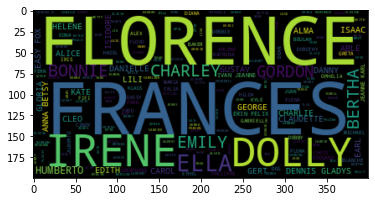

In [8]:
# Although using wordcloud is not scientific for this project, it would be a neat way of visualizing the more common names
# of hurricanes

group_storm_copy = group_storm.copy()
group_storm_copy = group_storm_copy.drop(group_storm_copy[group_storm_copy.Name == 'UNNAMED'].index)

wc = WordCloud().generate(' '.join(group_storm_copy['Name']))
plt.imshow(wc, interpolation='bilinear')

# Couple notes suggest that Frances and Florence are the two most common names in my dataset

In [9]:
# Create a function to add labels on the plot above the bars

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 10, y[i],ha = 'center', Bbox = dict(facecolor = 'orange', alpha =.8, edgecolor='black'))

/tmp/ipykernel_318/286291305.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i] + 10, y[i],ha = 'center', Bbox = dict(facecolor = 'orange', alpha =.8, edgecolor='black'))


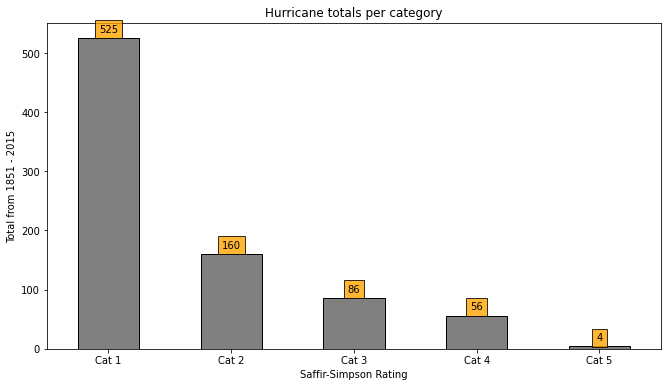

In [10]:
# Counts Hurricane categories and plots them

storm_counts = group_storm.Category.value_counts()
storm_plot = storm_counts.plot(kind='bar', xlabel='Saffir-Simpson Rating', ylabel='Total from 1851 - 2015', 
                               title="Hurricane totals per category", rot=0, color='Grey', 
                               figsize=(11,6), edgecolor = "black")

addlabels(storm_counts.index, storm_counts.values)

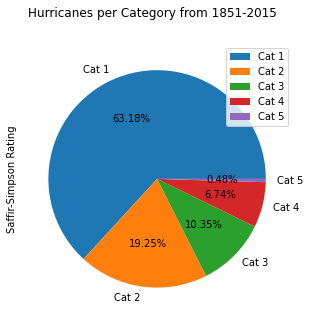

In [11]:
# We could also present a pie chart since we are looking at fractions of a whole

plot = storm_counts.plot(kind='pie', ylabel='Saffir-Simpson Rating', figsize=(5, 5), subplots=True, title='Hurricanes per Category from 1851-2015',
                        legend=True, autopct='%1.2f%%')

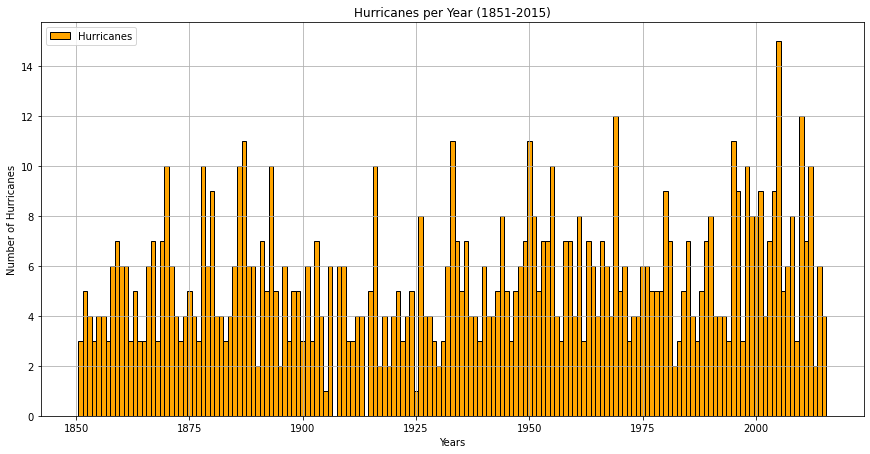

In [44]:
# Lets plot total hurricanes per year

count_storms = HU_storms.groupby(['Year', 'ID']).nunique()

# Going to create a dictionary and append all unique ID's to corresponding years
storm_dict = {}

# This dictionary loops through the unique groupby and creates keys with unique lists of values
for x in count_storms.index:
    if x[0] in storm_dict:
        storm_dict[x[0]].append(x[1])
    else:
        storm_dict[x[0]] = [(x[1])]

# This dictionary goes back through the previous dictionary, appending the length of the lists to the years
# The length of the list is the total number of unique Hurricanes for that given year (i.e. uniquely named or reported)
plottable_storm_dict = {}
for i in storm_dict:
    plottable_storm_dict[i] = len(storm_dict[i])

# Now using the plottable dictionary, we plot the values using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(*zip(*plottable_storm_dict.items()), width=1,color='orange', edgecolor='black', label='Hurricanes')
plt.tight_layout()
plt.title("Hurricanes per Year (1851-2015)")
plt.xlabel("Years")
plt.ylabel("Number of Hurricanes")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [13]:
# Similar to what was done above but with labels that fit this plot better

def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 4.5, y[i],ha = 'center')

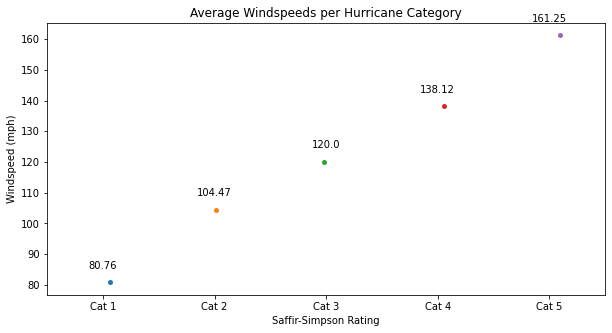

In [42]:
# Lets see what the average Max Windspeeds are for the individual categories of storms

# Create a dictionary to hold the categories respective wind speed means (mph)
categorical_mean = {}
category = ['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5']

for rating in category:
    categorical_mean[rating] = group_storm[group_storm['Category'] == rating]['Max_Sustained_Winds'].mean().round(2)

# Use seaborn to make some plots
keys = list(categorical_mean.keys())
vals = list(categorical_mean.values())
plt.figure(figsize=(10, 5))
cat_plot = sns.stripplot(x=category, y=vals)
cat_plot.set(xlabel ='Saffir-Simpson Rating', 
             ylabel = 'Windspeed (mph)', title ='Average Windspeeds per Hurricane Category')
addlabels2(keys, vals)

In [15]:
# Once again, using another similar label-adding function

def addlabels3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 4.5, y[i], ha = 'center')

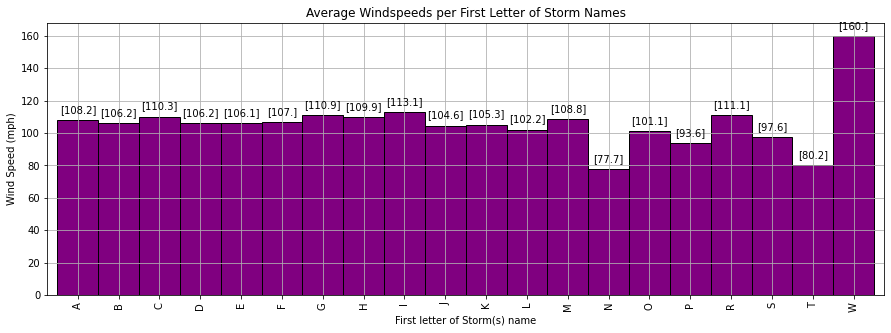

In [40]:
# The final topic for the Hurricane dataset is looking into the names, do names that begin with a specific
# letter produce different results?

# Copy HU_storms dataframe 
new_HU_storms = HU_storms.copy()

# Rather than worry about year, we just want the names of the storms, excluding the ones titles 'UNNAMED'
new_HU_storms = new_HU_storms.drop(new_HU_storms[new_HU_storms.Name == 'UNNAMED'].index)

# No need for several columns
new_HU_storms = new_HU_storms.drop(['Maximum Wind'], axis=1)
new_HU_storms = new_HU_storms.drop(['Month'], axis=1)
new_HU_storms = new_HU_storms.drop(['Day'], axis=1)
new_HU_storms = new_HU_storms.drop(['Time'], axis=1)

# Quick add of category column
new_HU_storms['Category'] = new_HU_storms.Max_Sustained_Winds.apply(lambda x: wind_declaration(x))
new_HU_storms = new_HU_storms.drop(new_HU_storms[new_HU_storms.Category == 'Post HU'].index)

# Create a new column that is of the first letter of the name of the storm
new_HU_storms['First_Letter'] = new_HU_storms['Name'].str[0]

# Calculate the mean for winds per letter
cleaned_HU_df = new_HU_storms.groupby(['First_Letter']).agg({'Max_Sustained_Winds': ['mean']})
letter_plot = cleaned_HU_df.plot(kind='bar', ylabel='Wind Speed (mph)', 
                                 xlabel='First letter of Storm(s) name', 
                                 title='Average Windspeeds per First Letter of Storm Names', legend=False,
                                width=1,color='purple', edgecolor='black', figsize=(15, 5), grid=True)
# Add's the values above bars
addlabels3(cleaned_HU_df.index, np.round(cleaned_HU_df.Max_Sustained_Winds.values, 1))

### Atlantic Ocean Temperature Data (1851 - 2015)

The next portion used EDA and some feature engineering on ocean temperature data from 1851 to 2015. Data is considered as deviations from normal (i.e. 0 degrees C) and contains a lower and upper confidence interval. You'll notice that the more recent we go in time, the more accurate the data becomes, as expected. The goal of the lower and upper bounds of confidence are to assist in accuracy, and are very useful for the earliest temperature readings.

In [17]:
# Pandas for Ocean Temperature dataset 

# Read in SST csv
SST_df = pd.read_csv("HadCRUT.5.0.1.0.analysis.summary_series.northern_hemisphere.annual.csv", 
                     delimiter=',', encoding="utf-8", skipinitialspace=True)

# Clean df for specific timeframe of project\
SST_df = SST_df[(SST_df['Time'] > 1850) & (SST_df['Time'] < 2016)]
SST_df.columns = ['Year', 'Average_Anomaly', 'Lower', 'Upper']
SST_df

,Year,Average_Anomaly,Lower,Upper
1,1851,-0.219249,-0.428398,-0.010100
2,1852,-0.235702,-0.457689,-0.013715
3,1853,-0.245392,-0.463199,-0.027585
4,1854,-0.174908,-0.371100,0.021284
5,1855,-0.245643,-0.450175,-0.041111
...,...,...,...,...
161,2011,0.725346,0.694135,0.756557
162,2012,0.784332,0.750343,0.818320
163,2013,0.776674,0.744152,0.809197
164,2014,0.907794,0.876537,0.939051


In [18]:
# Plot SST Anomalies per year

# Create df for standard anomalies
Initial_Anom_df = SST_df[['Year', 'Average_Anomaly']]

# Create df for lower and upper confidence intervals
Lower_Upper_df = SST_df[['Year', 'Lower', 'Upper']]

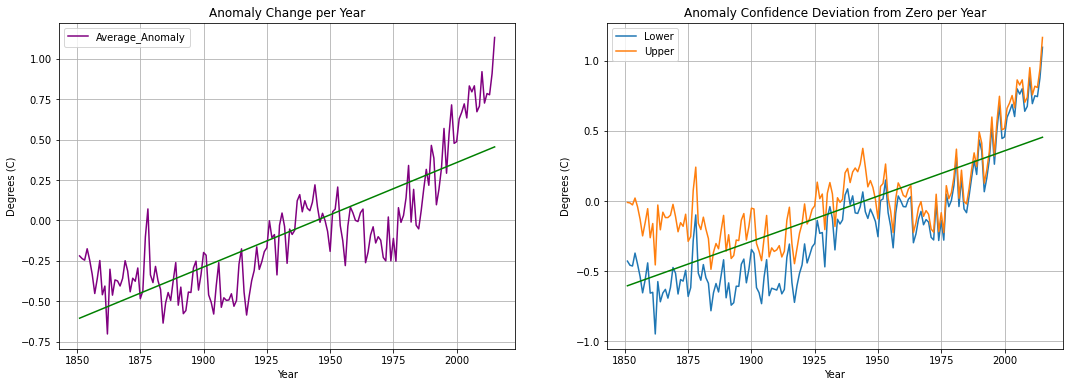

In [25]:
# Create dual plot of anomaly and confidence intervals

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))  # 1 row, 2 columns

years = np.array(Initial_Anom_df.Year)
anomaly = np.array(Initial_Anom_df.Average_Anomaly)
low = np.array(Lower_Upper_df.Lower)
up = np.array(Lower_Upper_df.Upper)

years= years.reshape(-1, 1)
anomaly= anomaly.reshape(-1, 1)
lin_model = LinearRegression().fit(years, anomaly)

y_hat = lin_model.predict(years)

Initial_Anom_df.plot(kind='line', x='Year', y='Average_Anomaly', ax=ax1, ylabel='Degrees (C)',
                    title='Anomaly Change per Year', grid=True, color='purple', legend=True)
ax1.plot(years, y_hat, color='green')
Lower_Upper_df.plot(kind='line', x='Year', y=['Lower', 'Upper'], ax=ax2, ylabel='Degrees (C)',
                   title='Anomaly Confidence Deviation from Zero per Year', grid=True)
ax2.plot(years, y_hat, color='green')

In [20]:
# Split by centuries to see how each fluctuated
nineteenth_cent_df = SST_df[SST_df['Year'] < 1900] 
twentieth_cent_df = SST_df[(SST_df['Year'] >= 1900) & (SST_df['Year'] < 2000)] 
twenty_first_cent_df = SST_df[SST_df['Year'] >= 2000]

# Renaming Anomaly columns to fit respective centuries
nineteenth_cent_plot = nineteenth_cent_df[['Year', 'Average_Anomaly']]
nineteenth_cent_plot = nineteenth_cent_plot.rename(columns={'Average_Anomaly': 'Average_Anomaly_1800'})

twentieth_cent_plot = twentieth_cent_df[['Year', 'Average_Anomaly']]
twentieth_cent_plot = twentieth_cent_plot.rename(columns={'Average_Anomaly': 'Average_Anomaly_1900'})

twenty_first_cent_plot = twenty_first_cent_df[['Year', 'Average_Anomaly']]
twenty_first_cent_plot = twenty_first_cent_plot.rename(columns={'Average_Anomaly': 'Average_Anomaly_2000'})

<AxesSubplot:title={'center':'Anomaly Change per Year (2000 - 2015)'}, xlabel='Year', ylabel='Degrees (C)'>

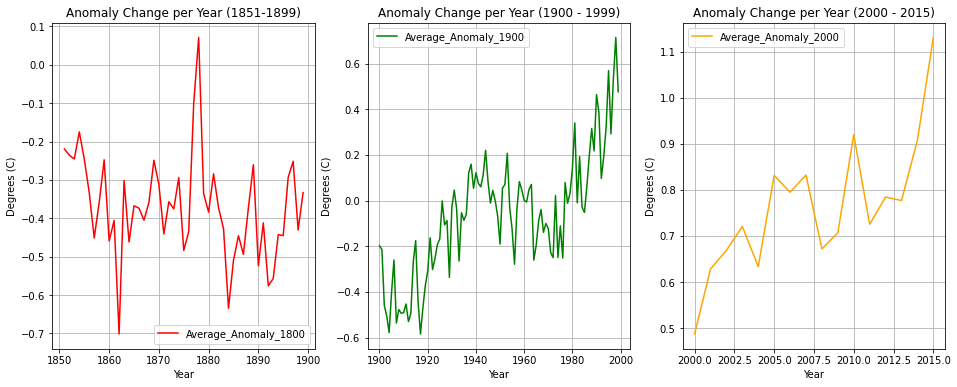

In [21]:
# Lets plot all three centuries to get an idea of the anomaly change

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))  # 1 row, 3 columns
nineteenth_cent_plot.plot(kind='line', x='Year', y='Average_Anomaly_1800', ax=ax1, ylabel='Degrees (C)',
                    title='Anomaly Change per Year (1851-1899)', grid=True, color='red')
twentieth_cent_plot.plot(kind='line', x='Year', y='Average_Anomaly_1900', ax=ax2, ylabel='Degrees (C)',
                    title='Anomaly Change per Year (1900 - 1999)', grid=True, color='green')
twenty_first_cent_plot.plot(kind='line', x='Year', y='Average_Anomaly_2000', ax=ax3, ylabel='Degrees (C)',
                    title='Anomaly Change per Year (2000 - 2015)', grid=True, color='orange')

Its worth noting that we see a fairly stable trend in the nineteenth century while the twentieth and twenty-first show change from the normal. 

### Combining Ocean Temperature results with Hurricane results

This step uses the cleaned dataframes from both datasets and compares results. The goal of this step is to merge plots and make hypothesis regarding the data. The focus will be on the entire timeframe, rather than individual centuries (as done in the final part of the Ocean Temperature section). 

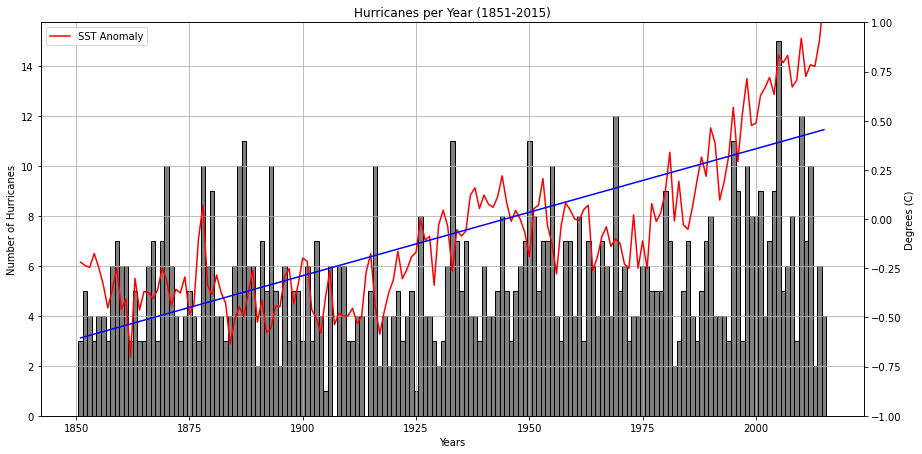

In [37]:
# Lets look back at the 'Hurricanes per Year' graph and plot the SST per year over it

# Hurricane Data
plt.figure(figsize=(12, 6))
plt.bar(*zip(*plottable_storm_dict.items()), width=1,color='grey', edgecolor='black', label='Hurricanes')
plt.tight_layout()
plt.title("Hurricanes per Year (1851-2015)")
plt.xlabel("Years")
plt.ylabel("Number of Hurricanes")
plt.grid(True)

# Plots the SST data on the Hurricane plot
axes2 = plt.twinx()
axes2.plot(Initial_Anom_df.Year, Initial_Anom_df.Average_Anomaly, color='red', label='SST Anomaly')
axes2.set_ylim(-1, 1)
axes2.set_ylabel('Degrees (C)')
axes2.legend(loc='upper left')
axes2.plot(years, y_hat, color='blue')

<AxesSubplot:>

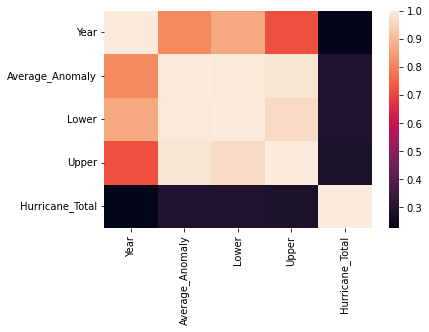

In [23]:
# plottable_storm_dict[1907] = 0
plottable_storm_dict

# Combine Hurricane total with SST df and convert to int's
SST_df['Hurricane_Total'] = SST_df['Year'].map(plottable_storm_dict)

# Fill NaN values with 0 (Since 0 actually occured)
SST_df = SST_df.fillna(0)
SST_df['Hurricane_Total'] = SST_df['Hurricane_Total'].astype(np.int64)
# SST_df[(SST_df['Year'] > 1900) & (SST_df['Year'] < 1920)]

SST_corr = SST_df.corr()

sns.heatmap(SST_corr, xticklabels=SST_corr.columns, yticklabels=SST_corr.columns)